# Loan Default Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# EDA - V1

In [2]:
df = pd.read_excel ('data-S8.xlsx', sheet_name='Sheet1')

**Observing the Dataset**

In [3]:
df.head()    

,PRODUCT_CODE,PRODUCT_NAME,PRODUCT_CATEGORY,CONTRACT_NO,CONTRACT_STATUS,IS_DEFAULT,CONTRACT_DATE,RECOVERY_STATUS,LAST_PAYMENT_DATE,RE_PROCESS_DATE,...,CITY,DISTRICT_NAME,PROVINCE,FINANCE_AMOUNT,CUSTOMER_VALUATION,EFFECTIVE_RATE,AGE,MARITAL_STATUS,INCOME,EXPENSE
0,HP,HIRE PURCHASE,HIRE PURCHASE,BLHP006419,S,0,20-AUG-2014,T,31-MAR-2017,NaN,...,BALANGODA,RATNAPURA,SABARAGAMUWA,290000.0,375000.0,28.00,62.0,M,46000.0,15000.0
1,HP,HIRE PURCHASE,HIRE PURCHASE,BLHP006425,W,1,22-AUG-2014,TRS,12-SEP-2019,30-NOV-2015,...,BALANGODA,RATNAPURA,SABARAGAMUWA,375000.0,475000.0,28.00,40.0,M,40000.0,10750.0
2,HP,HIRE PURCHASE,HIRE PURCHASE,BLHP006435,S,0,31-AUG-2014,T,09-MAR-2017,NaN,...,BALANGODA,RATNAPURA,SABARAGAMUWA,300000.0,500000.0,28.01,50.0,S,150000.0,75000.0
3,HP,HIRE PURCHASE,HIRE PURCHASE,BLHP006446,S,0,18-SEP-2014,NaN,25-JUL-2016,NaN,...,BALANGODA,RATNAPURA,SABARAGAMUWA,365000.0,600000.0,20.00,67.0,M,35000.0,9000.0
4,HP,HIRE PURCHASE,HIRE PURCHASE,BLHP006457,S,0,22-SEP-2014,NaN,02-OCT-2018,NaN,...,BALANGODA,RATNAPURA,SABARAGAMUWA,550000.0,700000.0,28.00,35.0,S,80000.0,30000.0


In [4]:
df.tail()

,PRODUCT_CODE,PRODUCT_NAME,PRODUCT_CATEGORY,CONTRACT_NO,CONTRACT_STATUS,IS_DEFAULT,CONTRACT_DATE,RECOVERY_STATUS,LAST_PAYMENT_DATE,RE_PROCESS_DATE,...,CITY,DISTRICT_NAME,PROVINCE,FINANCE_AMOUNT,CUSTOMER_VALUATION,EFFECTIVE_RATE,AGE,MARITAL_STATUS,INCOME,EXPENSE
81013,MB,MOTOR BICYCLE,LEASING,KRMBA005639,S,0,28-SEP-2016,NaN,15-SEP-2018,NaN,...,KIRINDIWELA,GAMPAHA,WESTERN,165193.0,235990.0,40.89,52.0,M,70000.0,25000.0
81014,TW,THREE WHEELER,LEASING,GPTWA008432,S,0,30-SEP-2016,NaN,26-SEP-2019,NaN,...,GAMPAHA,GAMPAHA,WESTERN,216500.0,315000.0,28.04,52.0,M,128150.0,32495.0
81015,MB,MOTOR BICYCLE,LEASING,EMMBA009743,S,0,30-SEP-2016,NaN,01-FEB-2019,NaN,...,EMBILIPITIYA,RATNAPURA,SABARAGAMUWA,86030.0,122900.0,42.63,45.0,M,60000.0,12500.0
81016,MB,MOTOR BICYCLE,LEASING,APMBA008319,R,1,03-OCT-2016,NaN,06-DEC-2016,NaN,...,ANURADHAPURA,ANURADHAPURA,NORTH CENTRAL,156000.0,224500.0,30.66,30.0,M,70000.0,24000.0
81017,TW,THREE WHEELER,LEASING,MRTWA006452,S,0,05-OCT-2016,T,04-MAR-2020,NaN,...,MATARA,MATARA,SOUTHERN,161000.0,230000.0,27.85,36.0,M,120000.0,49000.0


In [5]:
df.shape

(81018, 35)

In [6]:
df.columns

Index(['PRODUCT_CODE', 'PRODUCT_NAME', 'PRODUCT_CATEGORY', 'CONTRACT_NO',
       'CONTRACT_STATUS', 'IS_DEFAULT', 'CONTRACT_DATE', 'RECOVERY_STATUS',
       'LAST_PAYMENT_DATE', 'RE_PROCESS_DATE', 'RESCHEDULE', 'DUE_FREQUENCY',
       'NET_RENTAL', 'NET_RENTAL_NEW', 'NR_PMT', 'NO_OF_RENTAL',
       'PAID_RENTALS', 'CB_ARREARS_AGE', 'ASSET_TYPE_NAME', 'YOM', 'MAKE',
       'MODEL_NAME', 'REGISTRATION', 'REGISTRATION_NO', 'GENDER', 'CITY',
       'DISTRICT_NAME', 'PROVINCE', 'FINANCE_AMOUNT', 'CUSTOMER_VALUATION',
       'EFFECTIVE_RATE', 'AGE', 'MARITAL_STATUS', 'INCOME', 'EXPENSE'],
      dtype='object')

In [7]:
df.nunique()

PRODUCT_CODE             14
PRODUCT_NAME             14
PRODUCT_CATEGORY          4
CONTRACT_NO           80494
CONTRACT_STATUS           4
IS_DEFAULT                2
CONTRACT_DATE          1412
RECOVERY_STATUS          16
LAST_PAYMENT_DATE      2379
RE_PROCESS_DATE        1556
RESCHEDULE                2
DUE_FREQUENCY             1
NET_RENTAL            19138
NET_RENTAL_NEW        18031
NR_PMT                47796
NO_OF_RENTAL             59
PAID_RENTALS           1164
CB_ARREARS_AGE         4444
ASSET_TYPE_NAME          20
YOM                     104
MAKE                    247
MODEL_NAME             4973
REGISTRATION              2
REGISTRATION_NO       76282
GENDER                    2
CITY                     93
DISTRICT_NAME            24
PROVINCE                  9
FINANCE_AMOUNT        14261
CUSTOMER_VALUATION     1881
EFFECTIVE_RATE         3097
AGE                      68
MARITAL_STATUS            6
INCOME                 5837
EXPENSE                2886
dtype: int64

In [8]:
df.isnull().sum()

PRODUCT_CODE              0
PRODUCT_NAME              0
PRODUCT_CATEGORY          0
CONTRACT_NO               0
CONTRACT_STATUS           0
IS_DEFAULT                0
CONTRACT_DATE             0
RECOVERY_STATUS       36952
LAST_PAYMENT_DATE        45
RE_PROCESS_DATE       72273
RESCHEDULE                0
DUE_FREQUENCY             0
NET_RENTAL                0
NET_RENTAL_NEW            0
NR_PMT                    0
NO_OF_RENTAL              0
PAID_RENTALS              0
CB_ARREARS_AGE            0
ASSET_TYPE_NAME           0
YOM                       0
MAKE                      0
MODEL_NAME                8
REGISTRATION              0
REGISTRATION_NO         470
GENDER                  290
CITY                      0
DISTRICT_NAME             0
PROVINCE                  0
FINANCE_AMOUNT            0
CUSTOMER_VALUATION      222
EFFECTIVE_RATE            0
AGE                      21
MARITAL_STATUS         1687
INCOME                    0
EXPENSE                   0
dtype: int64

**Droping non features**

In [9]:
sample = df.drop(['PRODUCT_CODE', 'CONTRACT_NO',
       'CONTRACT_STATUS', 'CONTRACT_DATE', 'RECOVERY_STATUS',
       'LAST_PAYMENT_DATE', 'RE_PROCESS_DATE', 'RESCHEDULE', 'DUE_FREQUENCY',
       'PAID_RENTALS', 'CB_ARREARS_AGE','REGISTRATION_NO','PRODUCT_CATEGORY','MAKE'],axis=1)

In [10]:
sample.columns

Index(['PRODUCT_NAME', 'IS_DEFAULT', 'NET_RENTAL', 'NET_RENTAL_NEW', 'NR_PMT',
       'NO_OF_RENTAL', 'ASSET_TYPE_NAME', 'YOM', 'MODEL_NAME', 'REGISTRATION',
       'GENDER', 'CITY', 'DISTRICT_NAME', 'PROVINCE', 'FINANCE_AMOUNT',
       'CUSTOMER_VALUATION', 'EFFECTIVE_RATE', 'AGE', 'MARITAL_STATUS',
       'INCOME', 'EXPENSE'],
      dtype='object')

In [11]:
sample.head()

,PRODUCT_NAME,IS_DEFAULT,NET_RENTAL,NET_RENTAL_NEW,NR_PMT,NO_OF_RENTAL,ASSET_TYPE_NAME,YOM,MODEL_NAME,REGISTRATION,...,CITY,DISTRICT_NAME,PROVINCE,FINANCE_AMOUNT,CUSTOMER_VALUATION,EFFECTIVE_RATE,AGE,MARITAL_STATUS,INCOME,EXPENSE
0,HIRE PURCHASE,0,11996.0,11995,-11995.440424,36,Car,1979,LANCER,UNREGISTERED,...,BALANGODA,RATNAPURA,SABARAGAMUWA,290000.0,375000.0,28.00,62.0,M,46000.0,15000.0
1,HIRE PURCHASE,1,13070.0,13070,-13069.554943,48,Car,1985,LANCER,UNREGISTERED,...,BALANGODA,RATNAPURA,SABARAGAMUWA,375000.0,475000.0,28.00,40.0,M,40000.0,10750.0
2,HIRE PURCHASE,0,12410.0,12411,-12410.697120,36,Car,1984,COROLLA,UNREGISTERED,...,BALANGODA,RATNAPURA,SABARAGAMUWA,300000.0,500000.0,28.01,50.0,S,150000.0,75000.0
3,HIRE PURCHASE,0,11108.0,11107,-11107.082256,48,Car,1987,SUNNY,UNREGISTERED,...,BALANGODA,RATNAPURA,SABARAGAMUWA,365000.0,600000.0,20.00,67.0,M,35000.0,9000.0
4,HIRE PURCHASE,0,19169.0,19169,-19168.680584,48,Car,1990,MARCH.,UNREGISTERED,...,BALANGODA,RATNAPURA,SABARAGAMUWA,550000.0,700000.0,28.00,35.0,S,80000.0,30000.0


In [12]:
sample.isnull().sum()

PRODUCT_NAME             0
IS_DEFAULT               0
NET_RENTAL               0
NET_RENTAL_NEW           0
NR_PMT                   0
NO_OF_RENTAL             0
ASSET_TYPE_NAME          0
YOM                      0
MODEL_NAME               8
REGISTRATION             0
GENDER                 290
CITY                     0
DISTRICT_NAME            0
PROVINCE                 0
FINANCE_AMOUNT           0
CUSTOMER_VALUATION     222
EFFECTIVE_RATE           0
AGE                     21
MARITAL_STATUS        1687
INCOME                   0
EXPENSE                  0
dtype: int64

<AxesSubplot:>

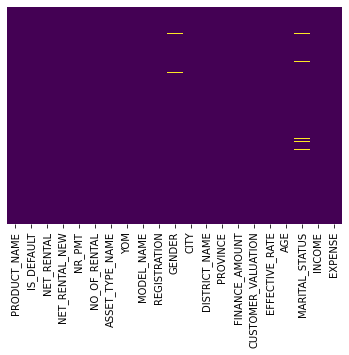

In [13]:
sns.heatmap(sample.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
def impute_mstatus(msts):
    MARITAL_STATUS = msts
    
    if pd.isnull(MARITAL_STATUS):
        return 'M'

    else:
        return MARITAL_STATUS

In [15]:
sample['MARITAL_STATUS'] = sample['MARITAL_STATUS'].apply(impute_mstatus)

***Now null values of Marital status are filled with 'M' which indicates the married***

In [16]:
#if sample['ASSET_TYPE_NAME'] == "not defined" :
    #sample = df.drop(['ASSET_TYPE_NAME'],axis=0)
    

**Relationship Analysis**

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le_new = LabelEncoder()
sample['Gen_n'] = le_new.fit_transform(sample['GENDER'])
sample['PName'] = le_new.fit_transform(sample['PRODUCT_NAME'])
#sample['PCat'] = le_new.fit_transform(sample['PRODUCT_CATEGORY'])
sample['AType'] = le_new.fit_transform(sample['ASSET_TYPE_NAME'])
#sample['Make'] = le_new.fit_transform(sample['MAKE'])
sample['Reg'] = le_new.fit_transform(sample['REGISTRATION'])
sample['DName'] = le_new.fit_transform(sample['DISTRICT_NAME'])
sample['City'] = le_new.fit_transform(sample['CITY'])
sample['MStatus'] = le_new.fit_transform(sample['MARITAL_STATUS'])


In [19]:
sample = sample.drop(['GENDER','PRODUCT_NAME','ASSET_TYPE_NAME','REGISTRATION','DISTRICT_NAME','CITY','MARITAL_STATUS'],axis=1)

In [20]:
sample.head()

,IS_DEFAULT,NET_RENTAL,NET_RENTAL_NEW,NR_PMT,NO_OF_RENTAL,YOM,MODEL_NAME,PROVINCE,FINANCE_AMOUNT,CUSTOMER_VALUATION,...,AGE,INCOME,EXPENSE,Gen_n,PName,AType,Reg,DName,City,MStatus
0,0,11996.0,11995,-11995.440424,36,1979,LANCER,SABARAGAMUWA,290000.0,375000.0,...,62.0,46000.0,15000.0,1,2,3,1,21,11,1
1,1,13070.0,13070,-13069.554943,48,1985,LANCER,SABARAGAMUWA,375000.0,475000.0,...,40.0,40000.0,10750.0,1,2,3,1,21,11,1
2,0,12410.0,12411,-12410.697120,36,1984,COROLLA,SABARAGAMUWA,300000.0,500000.0,...,50.0,150000.0,75000.0,1,2,3,1,21,11,3
3,0,11108.0,11107,-11107.082256,48,1987,SUNNY,SABARAGAMUWA,365000.0,600000.0,...,67.0,35000.0,9000.0,1,2,3,1,21,11,1
4,0,19169.0,19169,-19168.680584,48,1990,MARCH.,SABARAGAMUWA,550000.0,700000.0,...,35.0,80000.0,30000.0,0,2,3,1,21,11,3


**Droping categorical data**

In [21]:
corelation = sample.corr()

Text(0.5, 1.0, 'sample.corr()')

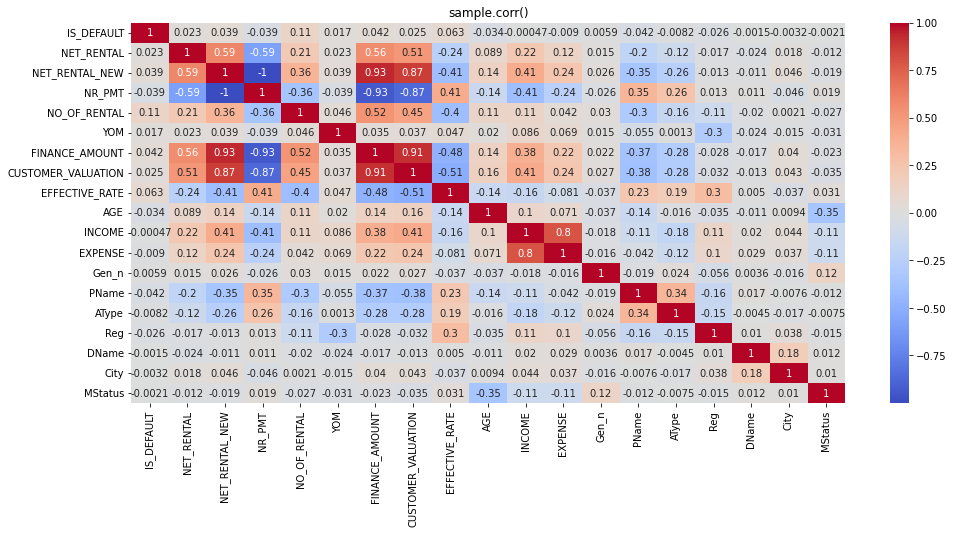

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
sns.heatmap(sample.corr(),cmap='coolwarm', annot=True)
plt.title('sample.corr()')

In [23]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(sample, 0.7)
corr_features

{'CUSTOMER_VALUATION', 'EXPENSE', 'FINANCE_AMOUNT', 'NR_PMT'}

In [32]:
sample1 = sample.drop(['CUSTOMER_VALUATION','NR_PMT'],axis=1)

In [33]:
sample1.describe()

,IS_DEFAULT,NET_RENTAL,NET_RENTAL_NEW,NO_OF_RENTAL,YOM,FINANCE_AMOUNT,EFFECTIVE_RATE,AGE,INCOME,EXPENSE,Gen_n,PName,AType,Reg,DName,City,MStatus
count,81018.000000,8.101800e+04,81018.000000,81018.000000,81018.000000,8.101800e+04,81018.000000,80997.000000,81018.000000,81018.000000,81018.000000,81018.000000,81018.000000,81018.000000,81018.000000,81018.000000,81018.000000
mean,0.081686,1.413739e+04,13134.504283,36.668543,1907.789022,3.506321e+05,28.912675,40.388422,79104.898933,26672.391914,0.758066,7.987682,11.301032,0.340060,9.542238,43.158323,1.793663
std,0.273887,2.509263e+04,13218.771010,10.770259,438.717473,4.617603e+05,6.216106,10.620025,72060.913838,30978.927282,0.436535,2.923389,3.535336,0.473732,7.267197,24.783009,0.983539
min,0.000000,2.000000e-02,1357.000000,6.000000,-201.000000,9.729130e+03,12.000000,5.000000,10000.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.990000e+03,7061.000000,36.000000,2005.000000,1.522500e+05,26.000000,32.000000,35000.000000,10500.000000,1.000000,7.000000,11.000000,0.000000,4.000000,22.000000,1.000000
50%,0.000000,9.401000e+03,9456.000000,36.000000,2013.000000,2.049900e+05,30.000000,39.000000,53904.000000,15800.000000,1.000000,9.000000,11.000000,0.000000,8.000000,41.000000,1.000000
75%,0.000000,1.352700e+04,13251.000000,42.000000,2015.000000,3.250000e+05,32.010000,47.000000,96000.000000,30000.000000,1.000000,9.000000,14.000000,1.000000,16.000000,63.000000,3.000000
max,1.000000,2.229216e+06,550080.000000,86.000000,6580.000000,1.160000e+07,49.990000,85.000000,500000.000000,400000.000000,2.000000,13.000000,19.000000,1.000000,23.000000,92.000000,5.000000


In [34]:
sample1 = sample1.drop(['NET_RENTAL'],axis=1)

In [35]:
sample1.columns

Index(['IS_DEFAULT', 'NET_RENTAL_NEW', 'NO_OF_RENTAL', 'YOM', 'MODEL_NAME',
       'PROVINCE', 'FINANCE_AMOUNT', 'EFFECTIVE_RATE', 'AGE', 'INCOME',
       'EXPENSE', 'Gen_n', 'PName', 'AType', 'Reg', 'DName', 'City',
       'MStatus'],
      dtype='object')

### Missing values and outliers handling

<AxesSubplot:xlabel='IS_DEFAULT', ylabel='AGE'>

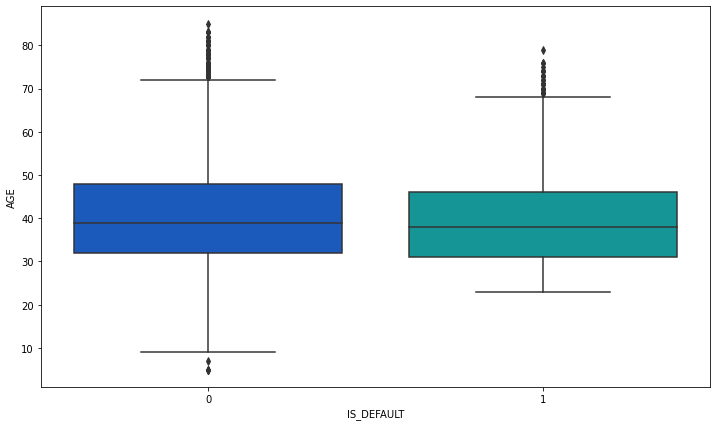

In [36]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='IS_DEFAULT',y='AGE',data=df,palette='winter')

In [37]:
mean = sample1['AGE'].mean()

In [38]:
Q1 = sample1['AGE'].quantile(0.25)
Q3 = sample1['AGE'].quantile(0.75)

In [39]:
IQR = Q3 - Q1

In [40]:
lower_extreme = Q1 - 1.5*IQR
upper_extreme = Q3 + 1.5*IQR

In [41]:
def impute_age(age):
    AGE = age
    
    if pd.isnull(AGE) :
        return mean
        
    elif AGE <= lower_extreme:
        return mean
    
    elif AGE >= upper_extreme:
        return mean

    else:
        return AGE

In [42]:
sample1['AGE'] = sample1['AGE'].apply(impute_age)

***outliers of age are fill with mean of the age***

In [43]:
sample1.columns

Index(['IS_DEFAULT', 'NET_RENTAL_NEW', 'NO_OF_RENTAL', 'YOM', 'MODEL_NAME',
       'PROVINCE', 'FINANCE_AMOUNT', 'EFFECTIVE_RATE', 'AGE', 'INCOME',
       'EXPENSE', 'Gen_n', 'PName', 'AType', 'Reg', 'DName', 'City',
       'MStatus'],
      dtype='object')

In [44]:
sample1.isnull().sum()

IS_DEFAULT        0
NET_RENTAL_NEW    0
NO_OF_RENTAL      0
YOM               0
MODEL_NAME        8
PROVINCE          0
FINANCE_AMOUNT    0
EFFECTIVE_RATE    0
AGE               0
INCOME            0
EXPENSE           0
Gen_n             0
PName             0
AType             0
Reg               0
DName             0
City              0
MStatus           0
dtype: int64

<AxesSubplot:>

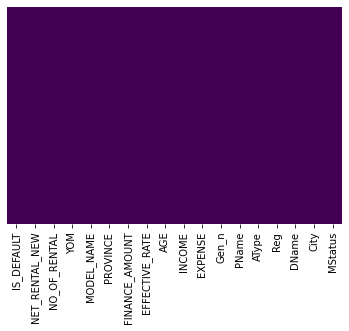

In [45]:
sns.heatmap(sample1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [46]:
def update_age(age):
    AGE = age
    
    if AGE <= 20 :
        return mean
        
    else:
        return AGE

In [47]:
sample1['AGE'] = sample1['AGE'].apply(update_age)

In [49]:
sample1 = sample1.drop(['PROVINCE'],axis=1)

In [51]:
sample1 = sample1.drop(['MODEL_NAME'],axis=1)

In [52]:
sample1.columns

Index(['IS_DEFAULT', 'NET_RENTAL_NEW', 'NO_OF_RENTAL', 'YOM', 'FINANCE_AMOUNT',
       'EFFECTIVE_RATE', 'AGE', 'INCOME', 'EXPENSE', 'Gen_n', 'PName', 'AType',
       'Reg', 'DName', 'City', 'MStatus'],
      dtype='object')